<a href="https://colab.research.google.com/github/archangel2006/Machine-Learning-Models/blob/main/SMS%20Spam%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS SPAM CLASSIFIER

Dataset: [sms-spam-collection-dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)  

# Using Naive Bayes

In [118]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD & EXPLORE DATA

In [119]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [120]:
df.shape

(5572, 5)

In [121]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [123]:
# Keeping Relavant Columns

df = df[['v1', 'v2']]

In [124]:
# Rename columns (for clarity)

df.columns = ['label', 'message']


In [125]:
# Cleaning message test

df['message'] = df['message'].str.strip()

In [126]:
df = df.drop_duplicates()

In [127]:
df.isnull().sum()

,0
label,0
message,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5158 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5158 non-null   object
 1   message  5158 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [129]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

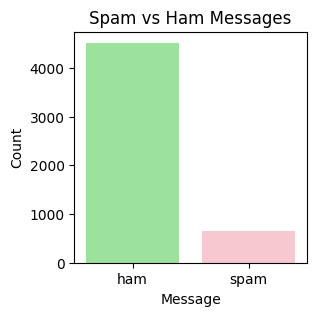

In [130]:
plt.figure(figsize=(3,3))
sns.countplot(x='label', data=df,hue='label', palette=['lightgreen','pink'] )
plt.title("Spam vs Ham Messages")
plt.xlabel("Message")
plt.ylabel("Count")
plt.show()

In [131]:
# pip install wordcloud

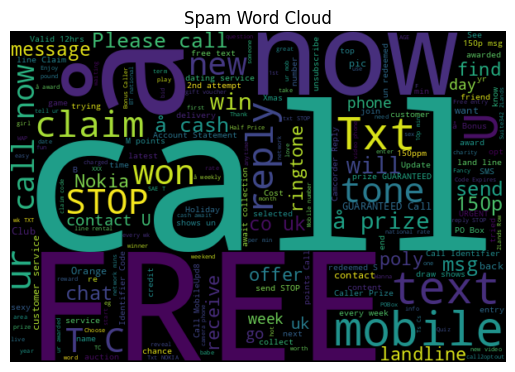

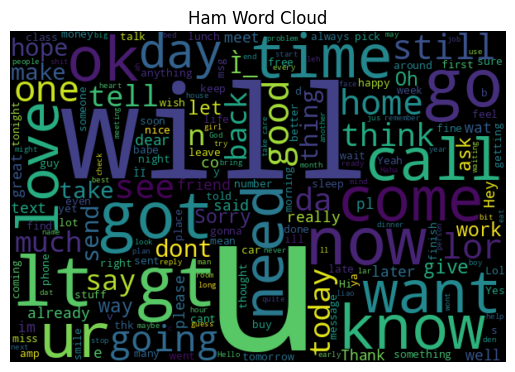

In [132]:
from wordcloud import WordCloud

spam_words = ''.join(df[df['label']=='spam']['message'])

# Spam
spam_wc = WordCloud(width=600, height=400).generate(spam_words)   # creates the cloud using word frequency in the spam_words string
plt.imshow(spam_wc, interpolation='bilinear') # renders the image
plt.axis('off') # hides x and y axes
plt.title("Spam Word Cloud")
plt.show()

# Ham
ham_wc = WordCloud(width=600, height=400).generate(ham_words)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Word Cloud")
plt.show()

# ENCODING

In [133]:
from sklearn.preprocessing import LabelEncoder

In [134]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label']) # ham=0, spam=1

In [135]:
df.head(3)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


# DEFINING PREDICTION TASK

In [136]:
x = df['message'] # Features
y = df['label'] # Target

# SPLIT - TRAIN & TEST DATA

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

# VECTORIZE TEXT

| Method              | Description                                                              | Example                                                   |
| ------------------- | ------------------------------------------------------------------------ | --------------------------------------------------------- |
| **CountVectorizer** | Counts how many times each word appears                                  | `"Free free win"` → `{free: 2, win: 1}`                   |
| **TfidfVectorizer** | Gives weight to important/rare words and reduces weight for common words | `"you the win"` → gives low score to "you", high to "win" |
| **Word Embeddings** | (e.g., Word2Vec, BERT) Turns words into semantic vectors                 | Not used here — more complex                              |


In [139]:
# import Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
# Vectorize training and test messages

tfidf = TfidfVectorizer()

x_train = tfidf.fit_transform(x_train_raw)
x_test = tfidf.transform(x_test_raw)

# TRAIN NAIVE BAYES CLASSIFIER

In [141]:
from sklearn.naive_bayes import MultinomialNB

In [142]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [143]:
y_pred = nb.predict(x_test)

# EVALUATE

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [145]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred)}")
print(f"Classification Report: {classification_report(y_test,y_pred)}")

Accuracy Score: 0.9554263565891473
Confusion Matrix: [[904   0]
 [ 46  82]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.98       904
           1       1.00      0.64      0.78       128

    accuracy                           0.96      1032
   macro avg       0.98      0.82      0.88      1032
weighted avg       0.96      0.96      0.95      1032



Naive Bayes classifier achieved an accuracy score of 95.16%, which indicates that the model correctly predicted spam or ham in most of the test messages.

| Metric           | Class 0 (Ham) | Class 1 (Spam) | Overall Interpretation                    |
| ---------------- | ------------- | -------------- | ----------------------------------------- |
| **Precision**    | 0.95          | **1.00**       | No ham misclassified as spam (great!)     |
| **Recall**       | **1.00**      | 0.62           | Missed 38% of actual spam messages        |
| **F1-Score**     | 0.97          | 0.76           | Spam detection could be improved          |
| **Support**      | 903           | 131            | Class imbalance present                   |
| **Accuracy**     | –             | –              | **95.16%** overall                        |
| **Macro Avg**    | –             | –              | Precision: 0.97, Recall: 0.81, F1: 0.87   |
| **Weighted Avg** | –             | –              | Balanced performance: 0.95 across metrics |


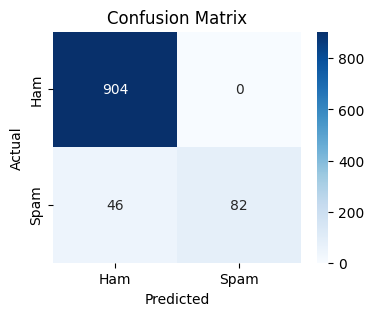

In [146]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

| Actual / Predicted | Ham (0) | Spam (1) |
| ------------------ | ------- | -------- |
| **Ham (0)**        | 903     | 0        |
| **Spam (1)**       | 50      | 81       |

- The model correctly classified all 903 ham messages — 100% precision and recall for ham.

- It misclassified 50 spam messages as ham, meaning these spam messages were missed (false negatives).

- It correctly identified 81 out of 131 spam messages.

# PREDICTION (Sample Input)

In [147]:
def predict_message(msg):
    # Transform the message using the same TF-IDF vectorizer
    msg_transformed = tfidf.transform([msg])

    # Predict using the trained model
    prediction = nb.predict(msg_transformed)[0]

    # Convert back to label
    label = "Spam" if prediction == 1 else "Ham"
    return label


In [148]:
sample1 = "Congratulations! You’ve won a $1000 Walmart gift card. Go to http://bit.ly/123 to claim now."
sample2 = "Hey, are we still meeting for dinner tonight?"

print("Sample 1 Prediction:", predict_message(sample1))
print("Sample 2 Prediction:", predict_message(sample2))


Sample 1 Prediction: Spam
Sample 2 Prediction: Ham
